In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**LOAD DATASET**

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data=pd.read_csv('gdrive/My Drive/RAKAMIN/Mini Project/hotel_bookings_data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
1373,Resort Hotel,1,61,2017,October,35,27,1,3,2,...,0,No Deposit,240.0,NaN,0,Personal,124.50,0,1,Canceled
90422,City Hotel,0,191,2018,August,23,3,1,2,2,...,0,No Deposit,3.0,NaN,0,Family,132.00,0,0,Check-Out
9442,Resort Hotel,1,76,2018,January,49,29,0,2,2,...,0,No Deposit,NaN,NaN,0,Family,50.00,0,0,Canceled
98210,City Hotel,0,336,2018,November,39,21,1,4,2,...,3,No Deposit,21.0,NaN,0,Family,39.00,0,0,Check-Out
89125,City Hotel,0,95,2018,July,21,16,1,1,2,...,0,No Deposit,22.0,NaN,0,Personal,90.95,0,0,Check-Out


In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**CHECK NULL VALUE**

In [ ]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

**HANDLING MISSING VALUES**

In [ ]:
data['children']= data['children'].fillna(0)

In [ ]:
data['city'] = data['city'].fillna('unknown')

In [ ]:
data['agent'] = data['agent'].fillna(0)

In [ ]:
data['company'] = data['company'].fillna(0)

In [ ]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

**Check and Replace Incorrect Value**

In [ ]:
data['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [ ]:
data['meal'] = data['meal'].replace(['Undefined'], ['No Meal'])

In [ ]:
data['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

**Create New Feature From Other Column Combinations**

In [ ]:
data['total_guests'] = data['adults'] + data['children'] + data['babies']

In [ ]:
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests
12410,Resort Hotel,1,310,2019,August,26,27,2,5,3,...,No Deposit,240.0,0.0,0,Personal,160.43,0,0,Canceled,4.0
112113,City Hotel,0,9,2019,July,20,15,1,4,2,...,No Deposit,7.0,0.0,0,Personal,129.20,0,2,Check-Out,2.0
46977,City Hotel,0,28,2018,March,6,31,2,0,2,...,No Deposit,9.0,0.0,0,Personal,89.00,0,1,Check-Out,2.0
53947,City Hotel,1,160,2018,September,27,2,2,4,3,...,No Deposit,9.0,0.0,0,Personal,125.80,0,0,Canceled,3.0
65243,City Hotel,1,629,2019,May,13,30,0,2,2,...,Non Refund,1.0,0.0,0,Personal,62.00,0,0,Canceled,2.0


In [ ]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,...,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363,1.968239
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,...,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798,0.722394
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000,2.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000


**Remove Rows From Filtered Columns**

In [ ]:
data.drop(data.index[data['total_guests'] == 0], inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_weekdays_nights        119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

**Tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel**

In [ ]:
monthly_booking = data.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['count','nunique']).reset_index()
monthly_booking.columns = ['tipe hotel', 'bulan', 'jumlah_booking', 'jumlah_tahun']
monthly_booking

,tipe hotel,bulan,jumlah_booking,jumlah_tahun
0,City Hotel,April,4950,2
1,City Hotel,August,7885,2
2,City Hotel,December,7594,2
3,City Hotel,February,4114,2
4,City Hotel,January,4336,2
5,City Hotel,July,8221,2
6,City Hotel,June,7469,2
7,City Hotel,March,3730,2
8,City Hotel,May,6434,2
9,City Hotel,November,7392,2


Melakukan Normalization agar data memiliki skala yang sama sehingga menjamin algoritma memperlakukan semua feature dengan adil

In [ ]:
monthly_booking['hasil_normalisasi'] = round(monthly_booking['jumlah_booking']/monthly_booking['jumlah_tahun'],1)
monthly_booking

,tipe hotel,bulan,jumlah_booking,jumlah_tahun,hasil_normalisasi
0,City Hotel,April,4950,2,2475.0
1,City Hotel,August,7885,2,3942.5
2,City Hotel,December,7594,2,3797.0
3,City Hotel,February,4114,2,2057.0
4,City Hotel,January,4336,2,2168.0
5,City Hotel,July,8221,2,4110.5
6,City Hotel,June,7469,2,3734.5
7,City Hotel,March,3730,2,1865.0
8,City Hotel,May,6434,2,3217.0
9,City Hotel,November,7392,2,3696.0


Mempersingkat nama bulan dengan hanya mengambil 3 karakter depan

In [ ]:
monthly_booking['bulan'] = monthly_booking['bulan'].str[:3]
monthly_booking

,tipe hotel,bulan,jumlah_booking,jumlah_tahun,hasil_normalisasi
0,City Hotel,Apr,4950,2,2475.0
1,City Hotel,Aug,7885,2,3942.5
2,City Hotel,Dec,7594,2,3797.0
3,City Hotel,Feb,4114,2,2057.0
4,City Hotel,Jan,4336,2,2168.0
5,City Hotel,Jul,8221,2,4110.5
6,City Hotel,Jun,7469,2,3734.5
7,City Hotel,Mar,3730,2,1865.0
8,City Hotel,May,6434,2,3217.0
9,City Hotel,Nov,7392,2,3696.0


*use categorical data to enable proper sorting with pd.Categorical*

In [ ]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_booking['months'] = pd.Categorical(monthly_booking['bulan'], categories=months, ordered=True)
monthly_booking.sample(5)

,tipe hotel,bulan,jumlah_booking,jumlah_tahun,hasil_normalisasi,months
13,Resort Hotel,Aug,3044,2,1522.0,Aug
18,Resort Hotel,Jun,3609,2,1804.5,Jun
0,City Hotel,Apr,4950,2,2475.0,Apr
4,City Hotel,Jan,4336,2,2168.0,Jan
10,City Hotel,Oct,8967,3,2989.0,Oct


## INTERPRETASI

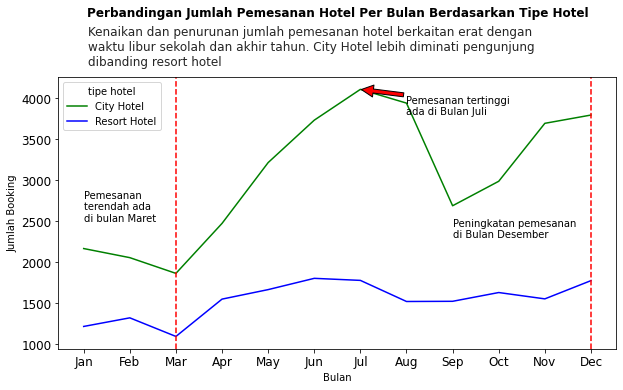

In [ ]:
# menggunakan multi line chart
plt.figure(figsize=(10,5))
axt = sns.lineplot(x='months', y='hasil_normalisasi', hue='tipe hotel', palette=['g', 'b'], data=monthly_booking)
plt.axvline('Mar', linestyle='--', color='red')
plt.text('Jan', 2500, s='Pemesanan\nterendah ada\ndi bulan Maret',fontweight='normal',fontsize=10);
plt.axvline('Dec', linestyle='--', color='red')
plt.text('Sep', 2300, s='Peningkatan pemesanan\ndi Bulan Desember',fontweight='normal',fontsize=10);
axt.annotate('Pemesanan tertinggi\nada di Bulan Juli', xy=('Jul', 4110), xytext=('Aug', 3800),
            arrowprops=dict(facecolor='red', shrink=0.02),
            )
axt.set_title('Perbandingan Jumlah Pemesanan Hotel Per Bulan Berdasarkan Tipe Hotel',color='black',fontsize=12,fontweight='bold', y=1.2)
axt.text(x = 0.1, y = 4400,
               s = 'Kenaikan dan penurunan jumlah pemesanan hotel berkaitan erat dengan \nwaktu libur sekolah dan akhir tahun. City Hotel lebih diminati pengunjung\ndibanding resort hotel',
              fontsize = 12, alpha = .85)
axt.set_ylabel('Jumlah Booking', fontsize=10) # y axis label
axt.set_xlabel('Bulan', fontsize=10) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 12)

Membuat Kolom Durasi Menginap

In [ ]:
data['durasi_inap'] = data['stays_in_weekend_nights']+data['stays_in_weekdays_nights']
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,durasi_inap
75365,City Hotel,1,313,2017,October,35,26,0,2,2,...,1.0,0.0,0,Family,62.00,0,0,Canceled,2.0,2
95931,City Hotel,0,157,2018,October,35,21,2,3,2,...,7.0,0.0,0,Personal,75.27,0,0,Check-Out,2.0,5
113138,City Hotel,0,104,2019,July,22,30,0,4,1,...,85.0,0.0,0,Personal,84.60,0,1,Check-Out,1.0,4
95330,City Hotel,0,0,2018,October,34,17,0,1,2,...,285.0,0.0,0,Personal,146.00,0,2,Check-Out,3.0,1
118813,City Hotel,0,111,2019,October,34,20,2,4,2,...,14.0,0.0,0,Personal,160.00,0,3,Check-Out,2.0,6


In [ ]:
data['durasi_inap'].describe()

count    119210.000000
mean          3.426248
std           2.540692
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: durasi_inap, dtype: float64

dari hasil statistik tersebut terlihat bahwa mean>median, dimana jika digambarkan pada grafik akan menghasilkan right skew

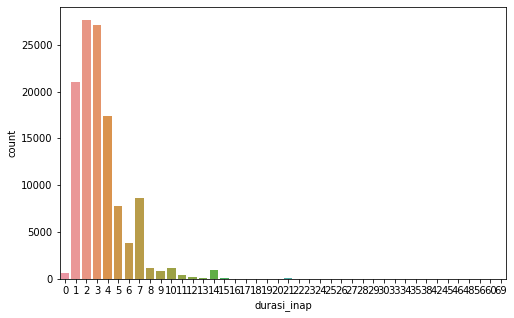

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='durasi_inap', data=data)

In [ ]:
# Mengelompokkan nilai-nilai supaya lebih signifikan dan dengan memperhatikan persebaran data
data['group_durasi_inap'] = np.where(data['durasi_inap'] > 21, 21, 
                                       np.where(data['durasi_inap'] > 14, 15, data['durasi_inap']))

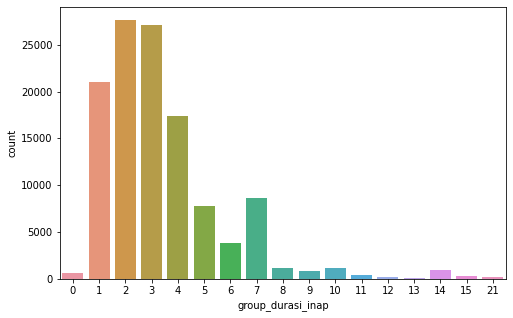

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x="group_durasi_inap")

In [ ]:
# tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel
canceled = data.groupby(['hotel', 'group_durasi_inap'])['is_canceled'].agg(['sum','count']).reset_index()
canceled.columns = ['tipe hotel', 'group_durasi_inap', 'cancel_booking', 'total'] #rename column
canceled

,tipe hotel,group_durasi_inap,cancel_booking,total
0,City Hotel,0,13,264
1,City Hotel,1,4103,13258
2,City Hotel,2,10432,21415
3,City Hotel,3,9482,21371
4,City Hotel,4,4853,12547
5,City Hotel,5,1775,4985
6,City Hotel,6,938,2049
7,City Hotel,7,808,2053
8,City Hotel,8,176,381
9,City Hotel,9,93,212


In [ ]:
#menambah kolom persentase
canceled['PercentCanceled'] = round(canceled['cancel_booking']*100.0/canceled['total'], 2)
canceled

,tipe hotel,group_durasi_inap,cancel_booking,total,PercentCanceled
0,City Hotel,0,13,264,4.92
1,City Hotel,1,4103,13258,30.95
2,City Hotel,2,10432,21415,48.71
3,City Hotel,3,9482,21371,44.37
4,City Hotel,4,4853,12547,38.68
5,City Hotel,5,1775,4985,35.61
6,City Hotel,6,938,2049,45.78
7,City Hotel,7,808,2053,39.36
8,City Hotel,8,176,381,46.19
9,City Hotel,9,93,212,43.87


# INTERPRETASI

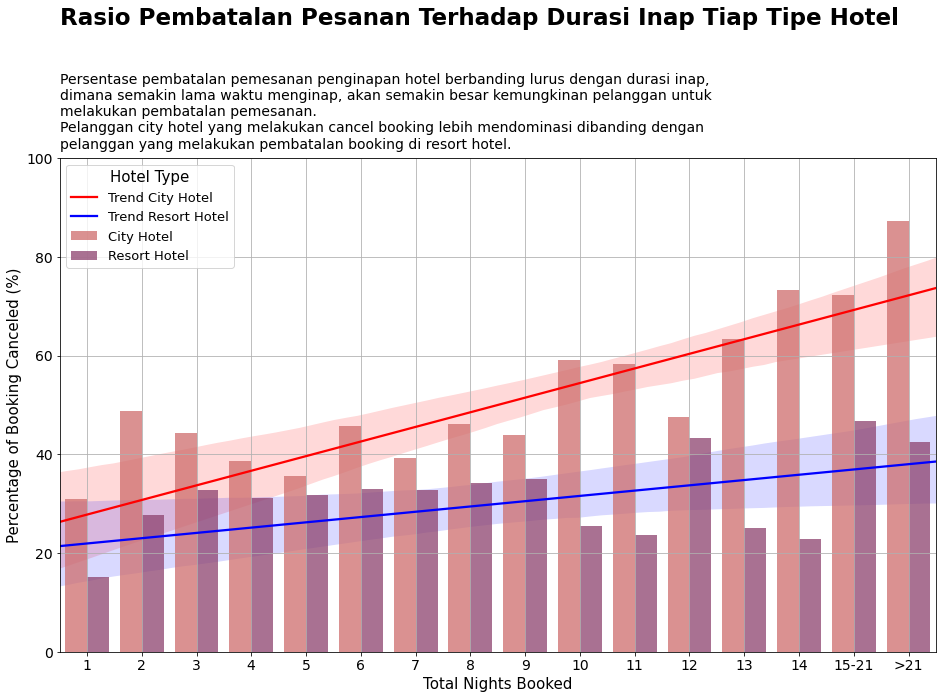

In [ ]:
plt.figure(figsize=(14,10))
sns.regplot(x='group_durasi_inap', y='PercentCanceled', data=canceled[canceled['tipe hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel', color="r")
sns.regplot(x='group_durasi_inap', y='PercentCanceled', data=canceled[canceled['tipe hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', color="b")
sns.barplot(x='group_durasi_inap', y='PercentCanceled', hue='tipe hotel', data=canceled, alpha=0.75,  palette='flare')

plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13}) 

plt.xticks(range(0,17,1), labels=[str(x) for x in range(0,15,1)]+["15-21",">21"])
plt.xlabel('Total Nights Booked', fontsize=15)
plt.ylabel('Percentage of Booking Canceled (%)', fontsize=15)
plt.ylim(0, 100) 
plt.xlim(0.5, 16.5) 

plt.text(x=0.5, y=127, s="Rasio Pembatalan Pesanan Terhadap Durasi Inap Tiap Tipe Hotel", 
         fontsize=23, fontweight='bold')
plt.text(x=0.5, y=102, s="Persentase pembatalan pemesanan penginapan hotel berbanding lurus dengan durasi inap,\ndimana semakin lama waktu menginap, akan semakin besar kemungkinan pelanggan untuk\nmelakukan pembatalan pemesanan.\nPelanggan city hotel yang melakukan cancel booking lebih mendominasi dibanding dengan\npelanggan yang melakukan pembatalan booking di resort hotel.", 
         fontsize=14) # memberikan keterangan tambahan atas judul

plt.tight_layout() # mengatur layout dari visualisasi agar tidak terpotong

In [ ]:
#melihat value unik lead time
lead_time = data['lead_time'].sort_values()
lead_time.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
# Mengkategorisasi kolom lead_time
data['lead_times'] = np.where(data['lead_time'] > 400, 401, data['lead_time']) # lead_time dengan value yg cukup besar  dikategorisasikan menjadi satu grup
bins = list(np.arange(0,max(data['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
data['lead_time_group'] = pd.cut(data['lead_times'],bins=bins, include_lowest=True, labels=labels) # groupping lead_time untuk setiap kelipatan 30

In [ ]:
# melakukan agregasi data untuk menghitung jumlah pemesanan berdasarkan group lead_time yang sudah dibuat dan berdasarkan tipe hotel
data_booked = data.groupby(['hotel','lead_time_group', 'is_canceled'])['hotel'].count().reset_index(name='num_bookings')
data_pivot = data_booked.pivot_table(index=['hotel','lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()
data_pivot.columns = ['hotel_type','lead_time_group', 'not_canceled', 'canceled']
data_pivot['all_bookings'] = data_pivot['not_canceled']+data_pivot['canceled']
data_pivot['pct_canceled'] = data_pivot['canceled']*100.0/(data_pivot['all_bookings']) 

data_pivot.head()

,hotel_type,lead_time_group,not_canceled,canceled,all_bookings,pct_canceled
0,City Hotel,0-30,18060,5184,23244,22.302530
1,City Hotel,30-60,7266,4608,11874,38.807479
2,City Hotel,60-90,5210,3692,8902,41.473826
3,City Hotel,90-120,3956,3486,7442,46.842247
4,City Hotel,120-150,3064,2542,5606,45.344274


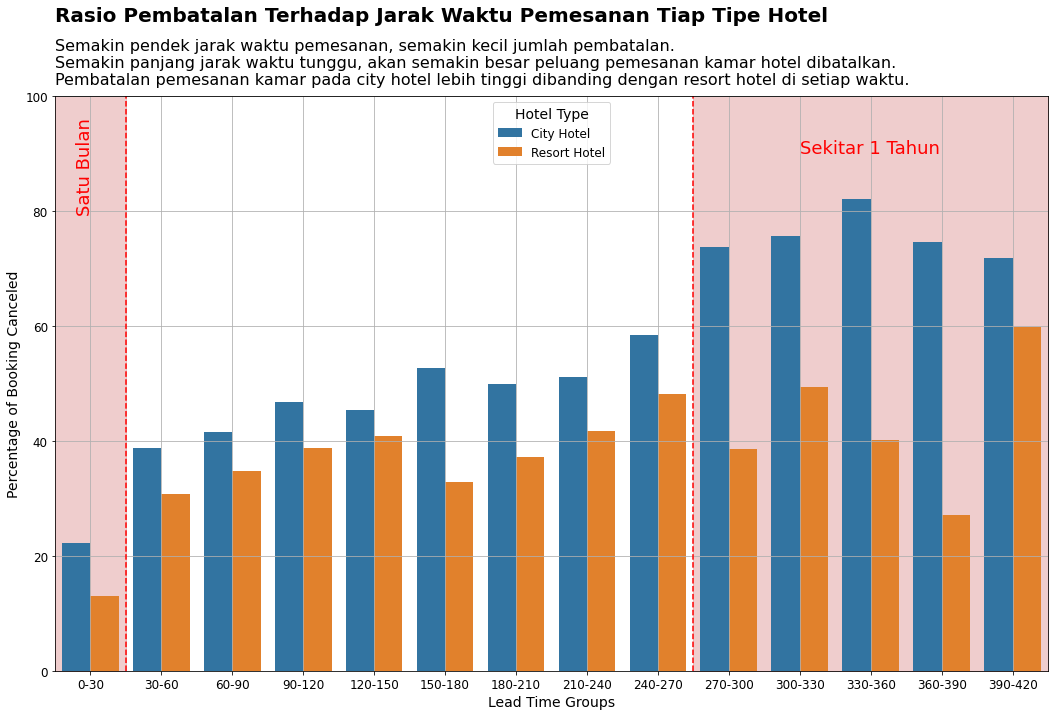

In [ ]:
plt.figure(figsize=(15,10)) 
sns.barplot(x='lead_time_group', y='pct_canceled', hue='hotel_type', data=data_pivot) 

plt.tick_params(axis='both', which='major', labelsize=12) 
plt.grid() 
plt.legend(title='Hotel Type', title_fontsize=14, prop={'size':12}, loc=9) 

plt.xlabel('Lead Time Groups', fontsize=14)
plt.ylabel('Percentage of Booking Canceled', fontsize=14) 
plt.ylim(0, 100) 
plt.xlim(-0.5,13.5) 

plt.axvline(0.5, ls='--', color='red') 
plt.text(x=-0.2, y=80, s='Satu Bulan', fontsize=18, color='red', rotation=90) 
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='indianred', alpha=0.3) 

plt.axvline(8.5, ls='--', color='red') 
plt.text(x=10, y=90, s='Sekitar 1 ', fontsize=18, color='red')
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='indianred', alpha=0.3)

plt.text(x=-0.5, y=113, s="Rasio Pembatalan Terhadap Jarak Waktu Pemesanan Tiap Tipe Hotel", 
         fontsize=20, fontweight='bold') 
plt.text(x=-0.5, y=102, s="Semakin pendek jarak waktu pemesanan, semakin kecil jumlah pembatalan.\nSemakin panjang jarak waktu tunggu, akan semakin besar peluang pemesanan kamar hotel dibatalkan.\nPembatalan pemesanan kamar pada city hotel lebih tinggi dibanding dengan resort hotel di setiap waktu.", 
         fontsize=16) 
 
plt.tight_layout() 